# Introduction to digital signal processing

Speech is the primary way humans communicate using **sound**. Speech is a **continuous signal** that unfolds over time and that is shaped by the movement of our articulatory organs such as the lips, tongue, and vocal cords.

From a physical perspective, spoken words are **pressure waves** that usually travel through the air. These sound waves vary in **frequency** (related to pitch) and **amplitude** (related to loudness). The complexity of these variations carries the rich information of human language.

To analyse and process speech computationally, we must convert these continuous acoustic signals into a form that reveals their structure To this end, we use various processing techniques that are introduced in this notebook.

1. **Fast Fourier Transform (FFT)**: breaks down the signal into its frequency components
2. **Mel-frequency scaling**: scales the frequency components to the Mel-scale, which reflects how humans perceive pitch
3. **Filterbanks**: enables the representation of sound segments using short numerical vectors

Techniques of digital signal processing pave the way for training automated speech recognition models such as Whisper.

# TO-DO: Add diagram depicting workflow

## Requirements

In [ ]:
from scipy import signal
from scipy.io import wavfile
import IPython.display as ipyd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torchaudio

## The Fast Fourier Transform (FFT)

The FFT is an algorithm that transforms the speech signal, consisting of multiple samples in the time domain, into its frequency components. For starters, let us understand a simple audio signal. It is defined by its frequency, its duration, and its sampling rate (i.e. how often per second samples are taken)

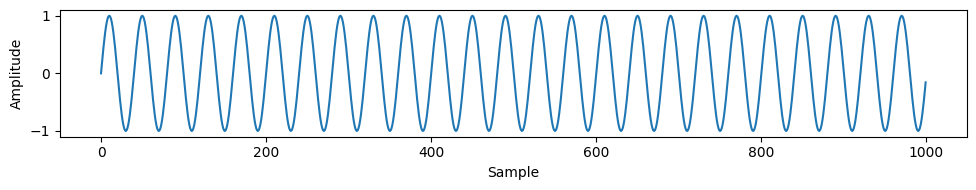

In [46]:
# Generate, visualise and play a sound with custom frequency and duration

def make_audio(duration=2, sampling_rate=16000, frequency=100, print=True):
    # Create the samples
    N = duration*sampling_rate # number of samples for given duration
    n = np.arange(N) # sample indices
    audio=np.sin(2*np.pi*(frequency/sampling_rate)*n) # generate sine wave

    # Visualise the first thousand samples
    if print:
        plt.figure(figsize=(10, 2))
        plt.plot(n[:1000], audio[:1000])
        plt.xlabel("Sample")
        plt.ylabel("Amplitude")
        plt.tight_layout()
        plt.show()

    # Play the sound
    return audio

# Customise the sound's parameters
duration = 2 # duration in seconds
sampling_rate = 16000 # sampling rate
frequency = 400 # frequency in Hertz (Hz)


# Generate, visualise and play the sound
audio = make_audio(duration=duration, sampling_rate=sampling_rate, frequency=frequency, print=True)
ipyd.Audio(rate=sampling_rate, data=audio)

The FFT is an algorithm that breaks down a signal into its constituent frequencies. If we apply the FFT to our audio signal, we will see its frequency components. For applying the FFT, we need to specify an audio and its sampling rate.

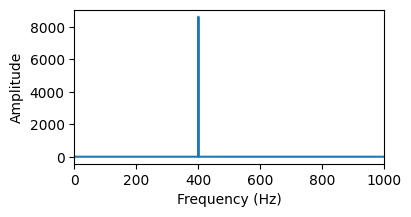

In [44]:
def apply_fft(audio, sampling_rate=16000):
    # Apply FFT
    N = len(audio)
    w = np.hamming(N)
    audioFFT = np.fft.fft(audio*w)
    
    # Plot spectrum
    plt.figure(figsize=(4, 2))
    plt.plot(np.linspace(0, sampling_rate*(N - 1)/N, N), np.abs(audioFFT))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 1000)
    plt.show()

apply_fft(audio=audio, sampling_rate=sampling_rate)

In [52]:
test

[array([0.        , 0.15333078, 0.30303527, ..., 0.88668826, 0.80530789,
        0.70488185]),
 array([0.        , 0.15333078, 0.30303527, ..., 0.88668826, 0.80530789,
        0.70488185]),
 array([0.        , 0.15333078, 0.30303527, ..., 0.88668826, 0.80530789,
        0.70488185]),
 array([ 0.        ,  0.12187281,  0.24192867, ..., -0.01046131,
        -0.13224947, -0.25206598])]

In [60]:
silence = make_audio(duration=0.1, sampling_rate=sampling_rate, frequency=0, print=False)
G4 = make_audio(duration=0.2, sampling_rate=sampling_rate, frequency=392, print=False)
Eflat4 = make_audio(duration=0.7, sampling_rate=sampling_rate, frequency=311.12, print=False)
test = np.concatenate((G4, G4, G4, Eflat4))
ipyd.Audio(rate=sampling_rate, data=test)

In [57]:
silence = make_audio(duration=2, sampling_rate=sampling_rate, frequency=0, print=False)
ipyd.Audio(rate=sampling_rate, data=silence)

/home/hanmul/Workshops/video-search/.venv/lib/python3.10/site-packages/IPython/lib/display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
/home/hanmul/Workshops/video-search/.venv/lib/python3.10/site-packages/IPython/lib/display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


In [ ]:
waveform, sample_rate = torchaudio.load("../data/3sec_Beethoven_ Symphony5.wav")
print(waveform.shape, sample_rate)

RuntimeError: Failed to open the input "../data/3sec_Beethoven_ Symphony5.wav" (No such file or directory).